In [5]:
# Import Library
import pandas as pd, numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# Dataset training
train = pd.read_csv('dataset\dummy_data raw\goemotions_1.csv')
train = pd.read_csv('dataset\dummy_data raw\goemotions_2.csv')
train = pd.read_csv('dataset\dummy_data raw\goemotions_3.csv')
train.head()

NameError: name 'dataset' is not defined

In [4]:
train.describe()

NameError: name 'train' is not defined

NameError: name 'train' is not defined

<AxesSubplot:>

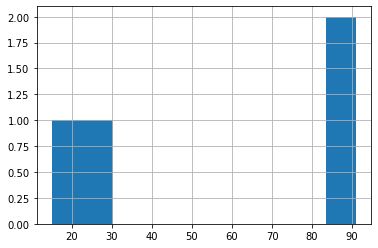

In [5]:
# Panjang dari komentar
lens = train.text.str.len()
print(lens.mean(), lens.std(), lens.min(), lens.max())

lens.hist()

In [6]:
train.shape[0] #rows

NameError: name 'train' is not defined

In [8]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = str(train.text.values)

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black'
).generate(text)

fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [9]:
import re, string

re_tok = re.compile(f'([{string.punctuation}“”¨«»®´·º½¾¿¡§£₤‘’])')

def tokenize(s): 
    # string which is not needed but appears frequently
    no_need = ['@', 'yang', 'dan', 'di', 'karena', 'untuk', 'juga', 'tahun', 'dr', 'atau', 'prabowo', 'jokowi']
    
    words = re_tok.sub(r' \1 ', s).split()
    return [x for x in words if not x in no_need]

In [11]:
tokenize(train.text[0])

NameError: name 'train' is not defined

In [12]:
vec = TfidfVectorizer(ngram_range=(1,2), tokenizer=tokenize,
               min_df=2, max_df=0.9, strip_accents='unicode', use_idf=1,
               smooth_idf=1, sublinear_tf=1 )

trn_term_doc = vec.fit_transform(train['text'])

# Use the same dataset to test
test = train
test_term_doc = vec.transform(test['text'])

NameError: name 'train' is not defined

In [13]:
trn_term_doc
test_term_doc

NameError: name 'trn_term_doc' is not defined

In [14]:
df_term_doc = pd.DataFrame(trn_term_doc.toarray())
df_term_doc

NameError: name 'trn_term_doc' is not defined

In [15]:
# Basic naive bayes feature equation
def pr(y_i, y):
    p = x[y==y_i].sum(0)
    return (p+1) / ((y==y_i).sum()+1)

In [16]:
x = trn_term_doc
test_x = test_term_doc

def get_mdl(y):
    y = y.values
    r = np.log(pr(1,y) / pr(0,y))
    m = LogisticRegression(C=4, dual=False)
    x_nb = x.multiply(r)
    return m.fit(x_nb, y), r

NameError: name 'trn_term_doc' is not defined

In [17]:
labels = ['anger', 'ending', 'ever', 'sadness', 'disgust', 'neutral', 'anticipation', 'joy']

preds = np.zeros((len(test), len(labels)))

for i, j in enumerate(labels):
   print('fit', j)
   m,r = get_mdl(train[j])
   preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]


NameError: name 'test' is not defined

In [18]:
result = pd.concat([test["text"], pd.DataFrame(preds, columns = labels)], axis=1)
result

NameError: name 'test' is not defined

In [19]:
#Simpan hasil yang ada pada CSV
result.to_csv('result.csv', index=False)

NameError: name 'result' is not defined

In [20]:
def predict_labels(text):
    for i, j in enumerate(labels):
        print('fit', j)
        m,r = get_mdl(train[j])
        preds[:,i] = m.predict_proba(test_x.multiply(r))[:,1]

In [21]:
test_x

NameError: name 'test_x' is not defined